In [5]:
!pip install kabaddiPy --upgrade


## Initializing the class

In [6]:
import kabaddiPy

pkl = kabaddiPy.PKL()



Breakdown Data:
                                  0              1
team_id                           6              7
team_name             Patna Pirates  Puneri Paltan
raids_total                      42             43
raids_successful                 13             18
raids_unsuccessful                8             11
raids_empty                      21             14
tackles_total                    22             23
tackles_successful               10              8
tackles_unsuccessful             12             15
points_total                     34             34
points_raid                      18             22
points_tackle                    10              9
points_all_out                    4              2
points_extras                     2              1
raid_success_rate             30.95          41.86
tackle_success_rate           45.45          34.78
longest_streak                    6              7
streak_percent            46.153846      53.846154


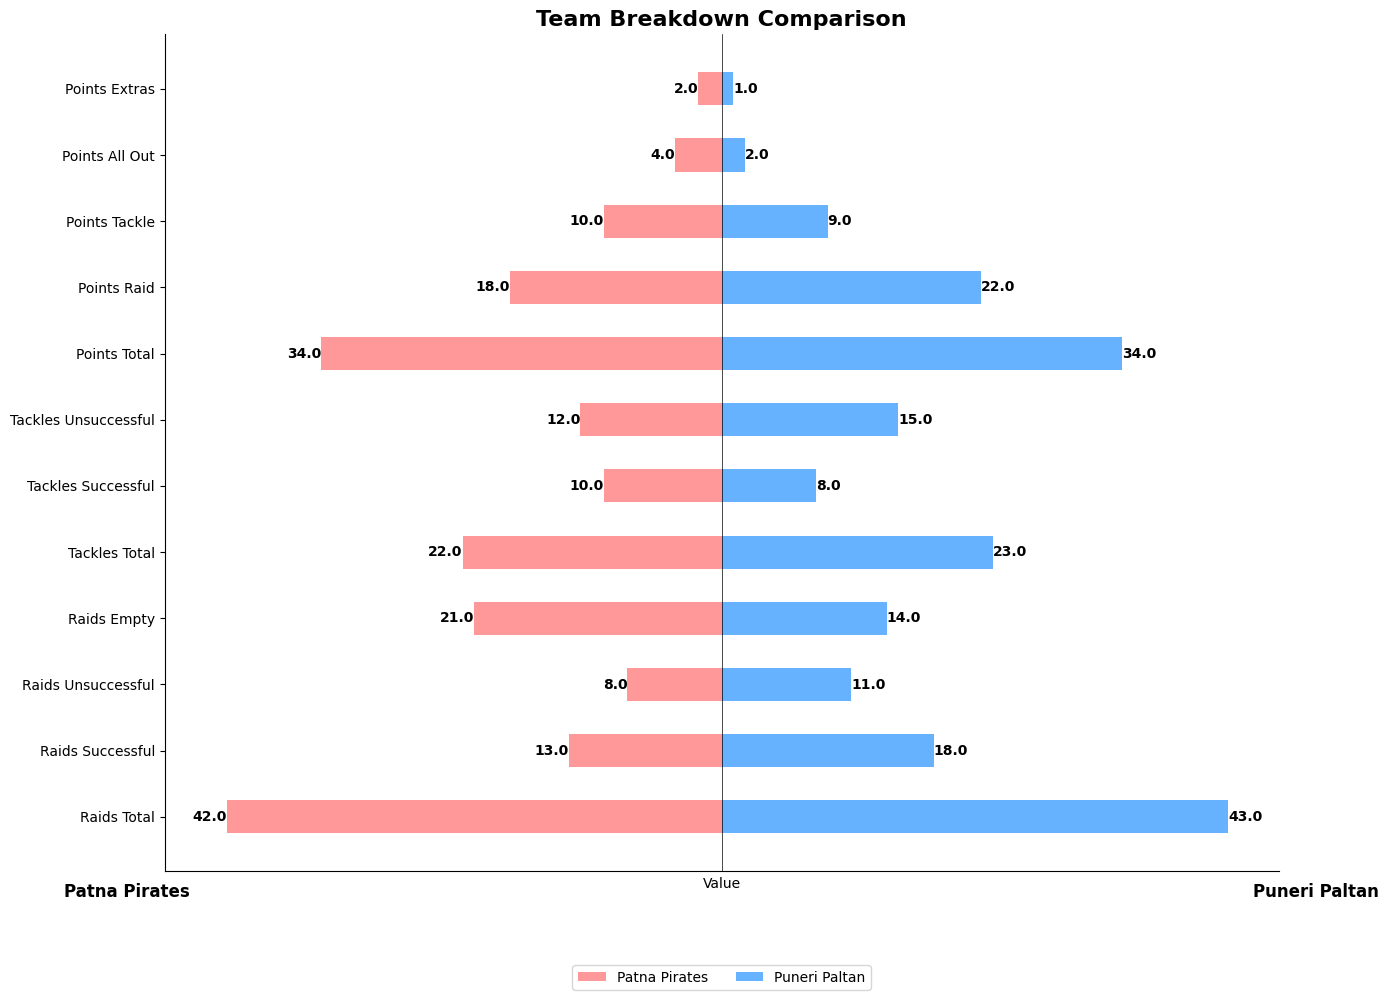

In [7]:
import matplotlib.pyplot as plt
import numpy as np

match_detail_df, events_df, zones_df, team1_df, team2_df, breakdown_df = pkl.load_match_details(season=9, match_id='2895')
# print("Match Detail:")
# print(match_detail_df)
# print("\nEvents (first 5 rows):")
# print(events_df.head() if events_df is not None else "No events data found")
# print("\nZones:")
# print(zones_df)
# print("\nTeam 1 (first 5 rows):")
# print(team1_df.head() if team1_df is not None else "No team 1 data found")
# print("\nTeam 2 (first 5 rows):")
# print(team2_df.head() if team2_df is not None else "No team 2 data found")
print("\nBreakdown Data:")
print(breakdown_df.T)

def plot_team_breakdown(breakdown_df):
    breakdown_df = breakdown_df.T
    # Prepare the data
    metrics = ['raids_total', 'raids_successful', 'raids_unsuccessful', 'raids_empty',
            'tackles_total', 'tackles_successful', 'tackles_unsuccessful',
            'points_total', 'points_raid', 'points_tackle', 'points_all_out', 'points_extras']

    team1_name = breakdown_df.loc['team_name', 0]
    team2_name = breakdown_df.loc['team_name', 1]

    team1_values = breakdown_df.loc[metrics, 0].astype(float)
    team2_values = breakdown_df.loc[metrics, 1].astype(float)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(14, 10))
    y_pos = np.arange(len(metrics))

    # Create the horizontal bars on opposite sides
    ax.barh(y_pos, -team1_values, height=0.5, align='center', label=team1_name, color='#FF9999')
    ax.barh(y_pos, team2_values, height=0.5, align='center', label=team2_name, color='#66B2FF')

    # Customize the plot
    ax.set_yticks(y_pos)
    ax.set_yticklabels([metric.replace('_', ' ').title() for metric in metrics])
    ax.set_xlabel('Value')
    ax.set_title('Team Breakdown Comparison', fontsize=16, fontweight='bold')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    # Add value labels on the bars
    for i, v in enumerate(team1_values):
        ax.text(-v, i, str(v), va='center', ha='right', fontweight='bold')
    for i, v in enumerate(team2_values):
        ax.text(v, i, str(v), va='center', ha='left', fontweight='bold')

    # Add a light grid
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set the x-axis limits to be symmetric
    max_value = max(team1_values.max(), team2_values.max())
    ax.set_xlim(-max_value * 1.1, max_value * 1.1)

    # Add team names as x-axis labels
    ax.text(-max_value * 1.05, -1, team1_name, ha='right', va='top', fontsize=12, fontweight='bold')
    ax.text(max_value * 1.05, -1, team2_name, ha='left', va='top', fontsize=12, fontweight='bold')

    # Remove x-axis ticks
    ax.set_xticks([])

    # Add a vertical line at x=0
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


# Call the function to plot the breakdown data
plot_team_breakdown(breakdown_df)


In [ ]:
# End
